<a href="https://colab.research.google.com/github/Rosari03/Metodos-Numericos/blob/main/Regla_Compuesta_de_Simpson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Regla compuesta de Simpson

La regla compuesta de Simpson se utiliza para aproximar la integral definida de una función \( f(x) \) en un intervalo \([a, b]\) dividiendo dicho intervalo en un número par \( n \) de subintervalos de igual longitud \( h \).

### Pasos:

1. **Dividir el intervalo**  
   Se divide el intervalo \([a, b]\) en \( n \) subintervalos (donde \( n \) debe ser par):  
   $
   h = \frac{b - a}{n}
   $

2. **Calcular los puntos**  
   Se calculan los puntos $ x_i $ para \( i = 0, 1, ..., n \):  
   $
   x_i = a + i \cdot h
   $

3. **Evaluar la función**  
   Se evalúa la función $ f(x) $ en los puntos \($ x_0, x_1, ..., x_n $\)

4. **Aplicar la fórmula compuesta de Simpson**  
   $
   \int_a^b f(x) \, dx \approx \frac{h}{3} \left[ f(x_0) + 4 \sum_{i=1,\,\text{impar}}^{n-1} f(x_i) + 2 \sum_{i=2,\,\text{par}}^{n-2} f(x_i) + f(x_n) \right]
   $




In [7]:
import numpy as np
import matplotlib.pyplot as plt
import math

def f(x):
    return np.exp(x)

# Función para calcular la integral usando la regla compuesta de Simpson
def simpson_compuesto(a, b, n):
    # Paso 1: Calcular h
    h = (b - a) / n

    # Paso 2: Inicializar X_I_0, X_I_1 y X_I_2
    X_I_0 = f(a) + f(b)
    X_I_1 = 0
    X_I_2 = 0

    # Paso 3: Realizar el ciclo para i = 1,...,n-1
    for i in range(1, n):
        # Paso 4: Calcular X = a + i * h
        x = a + i * h

        # Paso 5: Si i es par, sumar a X_I_2; si i es impar, sumar a X_I_1
        if i % 2 == 0:
            X_I_2 += f(x)
        else:
            X_I_1 += f(x)

    # Paso 6: Calcular la aproximación de la integral
    X_I = (h / 3) * (X_I_0 + 2 * X_I_2 + 4 * X_I_1)

    # Paso 7: Retornar la aproximación
    return X_I


In [8]:

# Ejemplo
a = 0  # Límite inferior
b = 4  # Límite superior
n = 6  # subintervalos

# Aproximación de la integral
resultado = simpson_compuesto(a, b, n)

print(f"La aproximación de la integral de e^x de {a} a {b} usando Simpson con n={n} subintervalos es: {resultado:.6f}")



La aproximación de la integral de e^x de 0 a 4 usando Simpson con n=6 subintervalos es: 53.653995


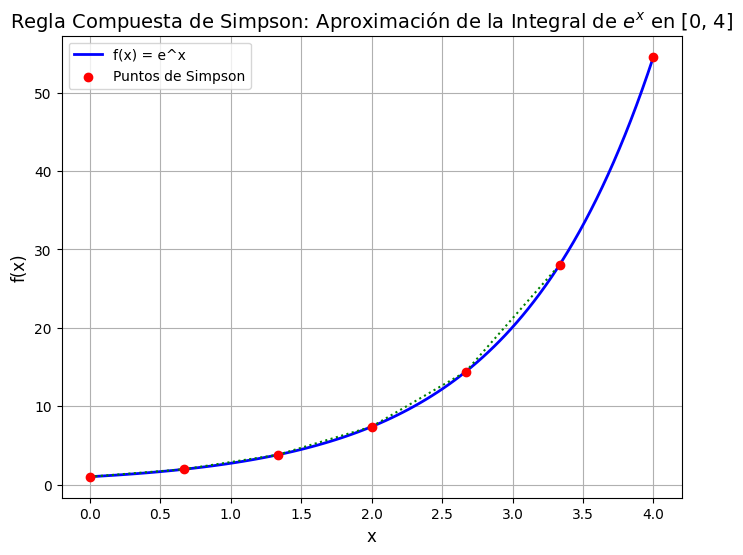

In [9]:
# Crear puntos para graficar la función e^x
x_values = np.linspace(a, b, 100)
y_values = f(x_values)

# Crear los puntos de la regla de Simpson
x_s = np.linspace(a, b, n+1)
y_s = f(x_s)

# Crear la gráfica
plt.figure(figsize=(8, 6))

# Graficar la función e^x
plt.plot(x_values, y_values, label="f(x) = e^x", color="blue", linewidth=2)

# Graficar los puntos de la regla de Simpson
plt.scatter(x_s, y_s, color="red", label="Puntos de Simpson", zorder=5)

# Mostrar líneas de la regla de Simpson (cada subintervalo)
for i in range(1, n):
    plt.plot([x_s[i-1], x_s[i]], [y_s[i-1], y_s[i]], color="green", linestyle=":")

# Etiquetas y título
plt.title(f"Regla Compuesta de Simpson: Aproximación de la Integral de $e^x$ en [0, 4]", fontsize=14)
plt.xlabel("x", fontsize=12)
plt.ylabel("f(x)", fontsize=12)
plt.legend()

# Mostrar la gráfica
plt.grid(True)
plt.show()
